In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input, Dense, Dropout

In [2]:
housing_data = pd.read_csv('sample_data/california_housing_train.csv')

In [3]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


In [4]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [5]:
housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [6]:
X = housing_data.drop(columns= ['median_house_value'])
y = housing_data.median_house_value

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 5000)

In [8]:
# Separating validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 2000)

In [9]:
len(X_train), len(X_val), len(X_test)

(10000, 2000, 5000)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [11]:
X_train.max(axis = 0), X_train.min(axis = 0), X_val.max(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.98767967, 0.99356223, 1.        , 0.74479249, 0.69140019,
        0.3418456 , 0.69111842, 1.        ]))

In [23]:
num_columns = X_train.shape[1]
num_outputs = 1
DROPOUT_RATE = 0.5

In [24]:
tf.keras.backend.clear_session()

In [25]:
model = Sequential([
    Input(num_columns),
    Dense(32, activation = 'relu'),
    Dropout(DROPOUT_RATE),
    Dense(64, activation = 'relu'),
    Dropout(DROPOUT_RATE),
    Dense(32, activation = 'relu'),
    Dropout(DROPOUT_RATE),
    Dense(num_outputs, activation = None),
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [27]:
model.compile(loss = 'mse')

In [28]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
313/313 [==============================] - 2s 3ms/step - loss: 57057390592.0000 - val_loss: 55945920512.0000
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 55248683008.0000 - val_loss: 51735851008.0000
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 46374522880.0000 - val_loss: 37228802048.0000
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 27802542080.0000 - val_loss: 16458956800.0000
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 17630547968.0000 - val_loss: 12828229632.0000
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 17401831424.0000 - val_loss: 12636018688.0000
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 17013038080.0000 - val_loss: 12230817792.0000
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 16693616640.0000 - val_loss: 12137750528.0000
Epoch 9/10
313/313 [====================

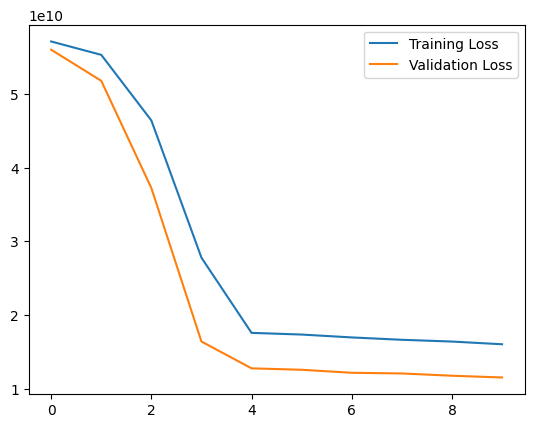

In [31]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [32]:
model.predict(X_train)

313/313 [==============================] - 0s 1ms/step


array([[243686.4 ],
       [165665.31],
       [229567.02],
       ...,
       [208117.67],
       [154658.33],
       [209380.12]], dtype=float32)

In [33]:
model.evaluate(X_train, y_train)

313/313 [==============================] - 0s 1ms/step - loss: 11457787904.0000


11457787904.0

In [34]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 2ms/step - loss: 11294595072.0000


11294595072.0

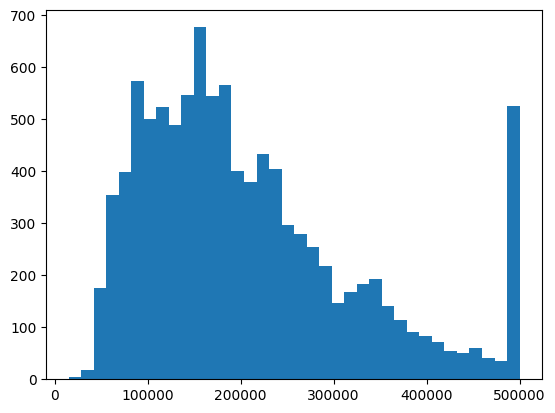

In [35]:
plt.hist(y_train, bins = 'fd')
plt.show()